# HW-4

## Dataset-2 Student Performance Data Set


### This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In this homework, subject of mathematics are used. There is one target attribute "G3", which shows the final grades of student. In the dataset, there are also midterm grades (G1 and G2). Since it is more difficult to predict G3 without G2 and G1, G2 and G1 are deleted from dataset.

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 “ 5th to 9th grade, 3 â€“ secondary education or 4 “ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 “ 5th to 9th grade, 3 “ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

In [82]:
#used libraries
library(data.table)
library(Matrix)
library(tidyverse)
library(dplyr)
library(glmnet)
library(caret)
library(data.table)
require(lubridate)
library(forecast)
library(e1071)
library(rpart)
require(data.table)
require(lubridate)
require(caret)
library(gbm)
library(rpart.plot)


In [3]:
#Reading dataset
data_set1 = read.csv(file="C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW4/student/student-mat.csv",header = TRUE, sep = ";")
data_set1 = as.data.frame(data_set1)
size_set1 = nrow(data_set1)
column_set1 =ncol(data_set1)
#training size determined as 0.70*dataset size
train_size1 = size_set1*0.70
#G1=MT1 notes G2=MT2 notes G3= Final notes

In [4]:
#generating training set and testing set
train_set1 = matrix(0,train_size1,column_set1)
test_set1 = matrix(0,(size_set1-train_size1+1),column_set1)
train_set1 = data_set1[1:train_size1,1:column_set1]
test_set1 = data_set1[(train_size1):size_set1,1:column_set1]
class_1_test = test_set1[,33]
class_1_train = train_set1[,33]
train_set1 =train_set1[,1:(column_set1-3)]
test_set1 =test_set1[,1:(column_set1-3)]
train_set1 =cbind(train_set1,class_1_train)
test_set1 =cbind(test_set1,class_1_test)
colnames(test_set1)[31] = 'Final_note'
colnames(train_set1)[31] = 'Final_note'

In [5]:
#Model 1 - Lasso Regression
#lambda is determined between 0.00001 and 0.001 with 6 values
lambda_seq = c(seq(0.00001,0.001,length=6))
train_set1=data.frame(train_set1)
set.seed(1)
n_repeats=5
n_folds=10
lasso_grid = expand.grid(alpha=1,lambda=lambda_seq)
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)                         
lassolr_fit = train(Final_note~ .,data=train_set1,
                family = "gaussian",
                 method = "glmnet", 
                 tuneGrid = lasso_grid,
                 trControl = Control) 

In [6]:
summary(lassolr_fit)
lassolr_fit

            Length Class      Mode     
a0            75   -none-     numeric  
beta        2925   dgCMatrix  S4       
df            75   -none-     numeric  
dim            2   -none-     numeric  
lambda        75   -none-     numeric  
dev.ratio     75   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        39   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      1   -none-     logical  
param          1   -none-     list     

glmnet 

276 samples
 30 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 249, 250, 248, 248, 248, 248, ... 
Resampling results across tuning parameters:

  lambda    RMSE      Rsquared   MAE     
  0.000010  4.322159  0.1850155  3.372441
  0.000208  4.322159  0.1850155  3.372441
  0.000406  4.322159  0.1850155  3.372441
  0.000604  4.322159  0.1850155  3.372441
  0.000802  4.322159  0.1850155  3.372441
  0.001000  4.322159  0.1850155  3.372441

Tuning parameter 'alpha' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 1 and lambda = 0.001.

In [68]:
#rmse of lasso model at alpha = 1 and lambda = 0.001
model_lasso_rmse = 4.322159

In [69]:
#Prediction with lasso
predict_lasso = predict(lassolr_fit, test_set1 )
#RMSE calculation between prediction and test data
model_predict_comp_lasso=sqrt(mean((test_set1$Final_note - predict_lasso)^2))


In [70]:
comp_lasso = c()
comp_lasso[1] = as.numeric(model_lasso_rmse)
comp_lasso[2]= as.numeric(model_predict_comp_lasso)

In [27]:
#Model 2- Decision Tree
set.seed(1)
n_repeats=5
n_folds=10
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)
#complexity parameter is selected as 0.01, 0.02, 0.03
grid_tree = expand.grid(cp=c(0.01, 0.02, 0.03))
#Three different model is trained with different minbucket values
tree_fit_minbucket7 = train(Final_note~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=7),
                tuneGrid = grid_tree)
tree_fit_minbucket10 = train(Final_note~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=10),
                            tuneGrid = grid_tree)
tree_fit_minbucket5 = train(Final_note~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=5),
                tuneGrid = grid_tree)

In [28]:
cat("Decision Tree Results @ minbucket=7")
tree_fit_minbucket7
cat("Decision Tree Results @ minbucket=5")
tree_fit_minbucket5
cat("Decision Tree Results @ minbucket=10")
tree_fit_minbucket10

Decision Tree Results @ minbucket=7

CART 

276 samples
 30 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 249, 250, 248, 248, 248, 248, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE     
  0.01  4.373848  0.1919859  3.322877
  0.02  4.229556  0.2072084  3.195830
  0.03  4.274138  0.1760222  3.231596

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.02.

Decision Tree Results @ minbucket=5

CART 

276 samples
 30 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 250, 247, 247, 250, 249, 248, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE     
  0.01  4.333945  0.1932356  3.267346
  0.02  4.234260  0.1985996  3.206042
  0.03  4.246514  0.1825829  3.238410

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.02.

Decision Tree Results @ minbucket=10

CART 

276 samples
 30 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 247, 250, 248, 246, 248, 248, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE     
  0.01  4.362598  0.1869901  3.400193
  0.02  4.345717  0.1753893  3.368365
  0.03  4.351829  0.1655460  3.367102

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.02.

In [71]:
#RMSE of decision tree at cp = 0.02 and minbucket=5
model_tree_rmse = 4.234260

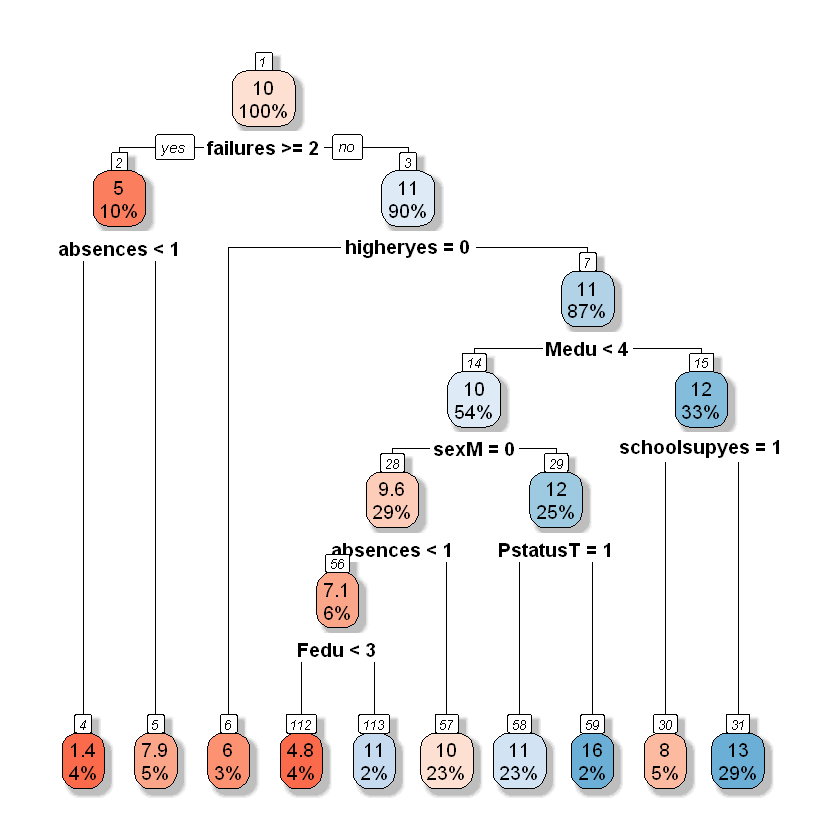

In [30]:
rpart.plot(tree_fit_minbucket5$finalModel, box.palette="RdBu", shadow.col="gray", nn=TRUE)


In [72]:
# Prediction with decision tree 
#RMSE is lowest when minbucket is equal to 5 
predict_tree = predict(tree_fit_minbucket5, test_set1 )
#RMSE calculation between prediction and test data
model_predict_comp_tree=sqrt(mean((test_set1$Final_note - predict_tree)^2))

In [73]:
comp_tree = c()
comp_tree[1] = as.numeric(model_tree_rmse)
comp_tree[2]= as.numeric(model_predict_comp_tree)

In [40]:
# Model 3: Random Forest
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#the minimal number of observations per tree leaf is determined with different values.
#Normally, it is set to 5
grid_random_forest <- expand.grid(mtry = c(1,5,9,11,15)) 

rf_fit = train(Final_note~ .,data=train_set1,
                 method = "rf", 
                 ntree=500,
                 nodesize=5,
                 trControl = Control,
                 tuneGrid = grid_random_forest)

Random Forest 

276 samples
 30 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 249, 250, 248, 248, 248, 248, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   1    4.247122  0.2641487  3.259941
   5    3.936576  0.2913484  3.072648
   9    3.890046  0.2962361  3.035218
  11    3.865458  0.3026115  3.009106
  15    3.843573  0.3046491  2.985793

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 15.

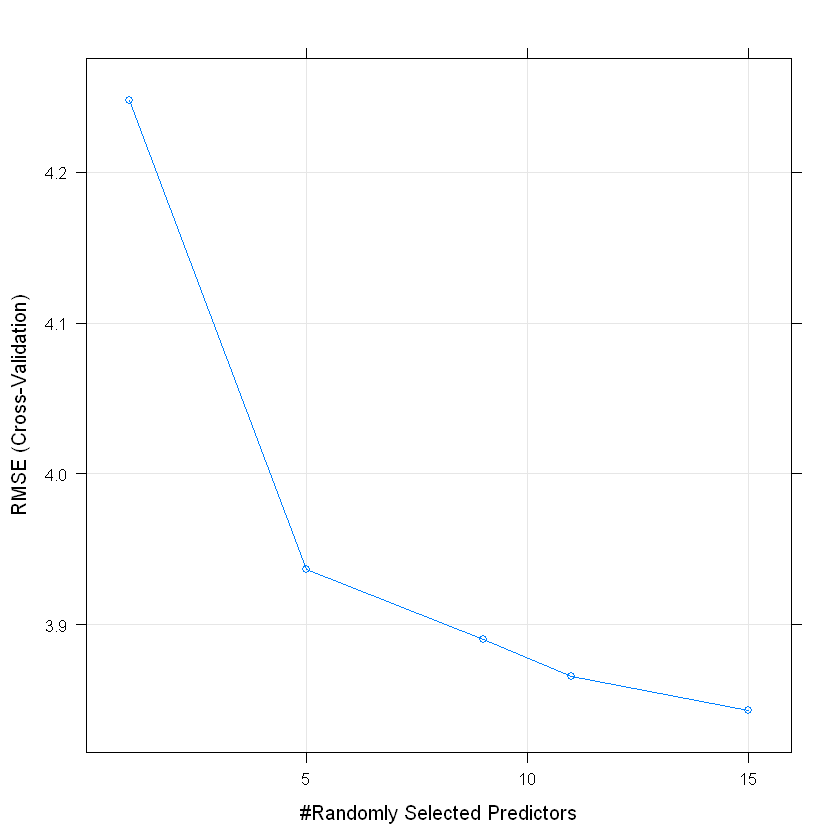

In [41]:
rf_fit
plot(rf_fit)

In [74]:
#RMSE of random forest at mtry=15
model_forest_rmse = 3.843573

In [75]:
#Prediction by using random forests method
predict_forest = predict(rf_fit, test_set1 )
#RMSE calculation between prediction and test data
model_predict_comp_forest=sqrt(mean((test_set1$Final_note - predict_forest)^2))

In [76]:
comp_forest = c()
comp_forest[1] = as.numeric(model_forest_rmse)
comp_forest[2]= as.numeric(model_predict_comp_forest)

In [54]:
# Model 4: Stochastic Gradient Boosting
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#Number of trees are set to 200, 300 and 400
#Interaction depth is set to 1, 3, and 5
#Learning rate is et to 0.001,0.01,0.1
#minobsinnode is set to 10 to avoid underfitting
grid_sgb <- expand.grid(n.trees = c(200,300,400), interaction.depth =c(1,3,5),shrinkage = c(0.001,0.01,0.1),n.minobsinnode = 10) 

sgb_fit = train(Final_note~ .,data=train_set1,
                method = 'gbm',
                 trControl = Control,
                 tuneGrid = grid_sgb)

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.9538             nan     0.0010    0.0055
     2       21.9474             nan     0.0010    0.0060
     3       21.9393             nan     0.0010    0.0059
     4       21.9328             nan     0.0010    0.0068
     5       21.9266             nan     0.0010    0.0057
     6       21.9195             nan     0.0010    0.0044
     7       21.9109             nan     0.0010    0.0057
     8       21.9054             nan     0.0010    0.0065
     9       21.8999             nan     0.0010    0.0057
    10       21.8916             nan     0.0010    0.0049
    20       21.8271             nan     0.0010    0.0060
    40       21.6952             nan     0.0010   -0.0001
    60       21.5750             nan     0.0010    0.0035
    80       21.4550             nan     0.0010    0.0051
   100       21.3521             nan     0.0010    0.0011
   120       21.2442             nan     0.0010    0.0034
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.9507             nan     0.0010    0.0071
     2       21.9385             nan     0.0010    0.0076
     3       21.9296             nan     0.0010    0.0068
     4       21.9189             nan     0.0010    0.0083
     5       21.9039             nan     0.0010    0.0088
     6       21.8950             nan     0.0010    0.0047
     7       21.8854             nan     0.0010    0.0080
     8       21.8756             nan     0.0010    0.0090
     9       21.8654             nan     0.0010    0.0055
    10       21.8513             nan     0.0010    0.0059
    20       21.7485             nan     0.0010    0.0099
    40       21.5462             nan     0.0010    0.0099
    60       21.3426             nan     0.0010    0.0074
    80       21.1652             nan     0.0010    0.0050
   100       21.0015             nan     0.0010    0.0055
   120       20.8262             nan     0.0010    0.0082
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.9496             nan     0.0010    0.0073
     2       21.9376             nan     0.0010    0.0094
     3       21.9244             nan     0.0010    0.0064
     4       21.9143             nan     0.0010    0.0086
     5       21.9018             nan     0.0010    0.0093
     6       21.8888             nan     0.0010    0.0084
     7       21.8757             nan     0.0010    0.0085
     8       21.8624             nan     0.0010    0.0073
     9       21.8498             nan     0.0010    0.0108
    10       21.8383             nan     0.0010    0.0057
    20       21.7062             nan     0.0010    0.0091
    40       21.4683             nan     0.0010    0.0037
    60       21.2313             nan     0.0010    0.0054
    80       20.9914             nan     0.0010    0.0082
   100       20.7674             nan     0.0010    0.0059
   120       20.5613             nan     0.0010    0.0080
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.8744             nan     0.0100    0.0811
     2       21.7955             nan     0.0100    0.0543
     3       21.7262             nan     0.0100    0.0546
     4       21.6440             nan     0.0100    0.0517
     5       21.6284             nan     0.0100    0.0019
     6       21.5663             nan     0.0100    0.0542
     7       21.5156             nan     0.0100    0.0552
     8       21.4566             nan     0.0100    0.0221
     9       21.4129             nan     0.0100    0.0544
    10       21.3552             nan     0.0100    0.0385
    20       20.8834             nan     0.0100    0.0495
    40       19.9736             nan     0.0100    0.0317
    60       19.2762             nan     0.0100    0.0239
    80       18.7389             nan     0.0100    0.0027
   100       18.2569             nan     0.0100    0.0151
   120       17.8004             nan     0.0100    0.0140
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.8661             nan     0.0100    0.0863
     2       21.7786             nan     0.0100    0.0580
     3       21.6865             nan     0.0100    0.0684
     4       21.5965             nan     0.0100    0.0718
     5       21.4954             nan     0.0100    0.1047
     6       21.3892             nan     0.0100    0.0797
     7       21.3006             nan     0.0100    0.0631
     8       21.1943             nan     0.0100    0.0892
     9       21.0949             nan     0.0100    0.0727
    10       20.9992             nan     0.0100    0.0119
    20       20.2001             nan     0.0100    0.0392
    40       18.7332             nan     0.0100    0.0521
    60       17.4783             nan     0.0100    0.0203
    80       16.4838             nan     0.0100    0.0027
   100       15.6219             nan     0.0100    0.0494
   120       14.9329             nan     0.0100    0.0201
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.8516             nan     0.0100    0.0585
     2       21.7320             nan     0.0100    0.0586
     3       21.6248             nan     0.0100    0.0523
     4       21.5000             nan     0.0100    0.0970
     5       21.3938             nan     0.0100    0.0556
     6       21.2769             nan     0.0100    0.0785
     7       21.1697             nan     0.0100    0.0844
     8       21.0347             nan     0.0100    0.0921
     9       20.9015             nan     0.0100    0.0674
    10       20.7907             nan     0.0100    0.0733
    20       19.7856             nan     0.0100    0.0866
    40       18.0975             nan     0.0100    0.0454
    60       16.6493             nan     0.0100    0.0337
    80       15.4430             nan     0.0100    0.0225
   100       14.4722             nan     0.0100    0.0025
   120       13.6055             nan     0.0100   -0.0171
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.2971             nan     0.1000    0.6486
     2       20.8204             nan     0.1000    0.3223
     3       20.6866             nan     0.1000   -0.0051
     4       20.0739             nan     0.1000    0.5295
     5       19.6369             nan     0.1000    0.4038
     6       19.3019             nan     0.1000    0.1559
     7       18.8984             nan     0.1000    0.2404
     8       18.5189             nan     0.1000    0.2207
     9       18.2997             nan     0.1000    0.1111
    10       18.0433             nan     0.1000    0.0595
    20       16.4854             nan     0.1000    0.0464
    40       14.8571             nan     0.1000   -0.0538
    60       13.8533             nan     0.1000    0.0363
    80       13.1979             nan     0.1000   -0.1147
   100       12.7383             nan     0.1000   -0.0718
   120       12.4250             nan     0.1000   -0.0885
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0678             nan     0.1000    0.7288
     2       20.0685             nan     0.1000    0.6577
     3       19.4260             nan     0.1000    0.3181
     4       18.5511             nan     0.1000    0.5923
     5       17.9762             nan     0.1000    0.5493
     6       17.5547             nan     0.1000    0.2684
     7       17.1741             nan     0.1000    0.1638
     8       16.7016             nan     0.1000    0.3848
     9       16.2724             nan     0.1000    0.1023
    10       15.5769             nan     0.1000    0.2658
    20       12.8382             nan     0.1000   -0.0892
    40       10.3522             nan     0.1000   -0.1189
    60        9.1629             nan     0.1000   -0.0457
    80        8.2447             nan     0.1000   -0.0789
   100        7.6208             nan     0.1000   -0.1211
   120        6.9396             nan     0.1000   -0.0654
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.2986             nan     0.1000    0.1836
     2       20.6672             nan     0.1000    0.0531
     3       19.6058             nan     0.1000    0.8750
     4       18.3988             nan     0.1000    0.9680
     5       17.6564             nan     0.1000    0.6654
     6       17.0512             nan     0.1000   -0.0625
     7       16.3072             nan     0.1000    0.5918
     8       15.7094             nan     0.1000    0.3230
     9       15.2064             nan     0.1000    0.1981
    10       14.7863             nan     0.1000    0.1645
    20       11.6119             nan     0.1000    0.1224
    40        8.6092             nan     0.1000   -0.0267
    60        7.1119             nan     0.1000   -0.1094
    80        6.1708             nan     0.1000   -0.0866
   100        5.2739             nan     0.1000   -0.0863
   120        4.6099             nan     0.1000   -0.0875
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2048             nan     0.0010    0.0090
     2       20.1967             nan     0.0010    0.0090
     3       20.1896             nan     0.0010    0.0076
     4       20.1818             nan     0.0010    0.0067
     5       20.1744             nan     0.0010    0.0063
     6       20.1653             nan     0.0010    0.0091
     7       20.1583             nan     0.0010    0.0072
     8       20.1501             nan     0.0010    0.0069
     9       20.1424             nan     0.0010    0.0047
    10       20.1405             nan     0.0010    0.0009
    20       20.0717             nan     0.0010    0.0054
    40       19.9326             nan     0.0010    0.0032
    60       19.7998             nan     0.0010    0.0070
    80       19.6822             nan     0.0010    0.0056
   100       19.5709             nan     0.0010    0.0053
   120       19.4483             nan     0.0010    0.0052
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2072             nan     0.0010    0.0040
     2       20.1967             nan     0.0010    0.0064
     3       20.1853             nan     0.0010    0.0062
     4       20.1763             nan     0.0010    0.0094
     5       20.1671             nan     0.0010    0.0097
     6       20.1588             nan     0.0010    0.0065
     7       20.1508             nan     0.0010    0.0058
     8       20.1422             nan     0.0010    0.0085
     9       20.1323             nan     0.0010    0.0075
    10       20.1213             nan     0.0010    0.0073
    20       20.0294             nan     0.0010    0.0076
    40       19.8415             nan     0.0010    0.0070
    60       19.6585             nan     0.0010    0.0068
    80       19.4785             nan     0.0010    0.0065
   100       19.3154             nan     0.0010    0.0072
   120       19.1534             nan     0.0010    0.0051
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2035             nan     0.0010    0.0079
     2       20.1934             nan     0.0010    0.0092
     3       20.1827             nan     0.0010    0.0081
     4       20.1724             nan     0.0010    0.0075
     5       20.1591             nan     0.0010    0.0112
     6       20.1481             nan     0.0010    0.0072
     7       20.1395             nan     0.0010    0.0052
     8       20.1272             nan     0.0010    0.0103
     9       20.1172             nan     0.0010    0.0108
    10       20.1074             nan     0.0010    0.0085
    20       19.9953             nan     0.0010    0.0083
    40       19.7695             nan     0.0010    0.0089
    60       19.5561             nan     0.0010    0.0086
    80       19.3543             nan     0.0010    0.0087
   100       19.1433             nan     0.0010    0.0096
   120       18.9501             nan     0.0010    0.0060
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.1274             nan     0.0100    0.0682
     2       20.0524             nan     0.0100    0.0811
     3       19.9644             nan     0.0100    0.0715
     4       19.8923             nan     0.0100    0.0566
     5       19.8219             nan     0.0100    0.0708
     6       19.7713             nan     0.0100    0.0519
     7       19.7001             nan     0.0100    0.0515
     8       19.6483             nan     0.0100    0.0634
     9       19.5851             nan     0.0100    0.0602
    10       19.5251             nan     0.0100    0.0580
    20       19.0358             nan     0.0100    0.0493
    40       18.1872             nan     0.0100    0.0049
    60       17.5865             nan     0.0100    0.0046
    80       17.1415             nan     0.0100    0.0083
   100       16.7044             nan     0.0100    0.0064
   120       16.3725             nan     0.0100   -0.0067
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.1002             nan     0.0100    0.0640
     2       20.0036             nan     0.0100    0.0997
     3       19.9010             nan     0.0100    0.0832
     4       19.7904             nan     0.0100    0.0743
     5       19.7113             nan     0.0100    0.0795
     6       19.6320             nan     0.0100    0.0786
     7       19.5651             nan     0.0100    0.0561
     8       19.4743             nan     0.0100    0.0680
     9       19.3763             nan     0.0100    0.0317
    10       19.2882             nan     0.0100    0.0486
    20       18.4827             nan     0.0100    0.0483
    40       17.2418             nan     0.0100    0.0564
    60       16.2760             nan     0.0100    0.0260
    80       15.4314             nan     0.0100    0.0040
   100       14.7363             nan     0.0100   -0.0020
   120       14.0763             nan     0.0100   -0.0026
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.1116             nan     0.0100    0.0709
     2       20.0060             nan     0.0100    0.0958
     3       19.8888             nan     0.0100    0.0763
     4       19.7565             nan     0.0100    0.0924
     5       19.6239             nan     0.0100    0.0677
     6       19.5376             nan     0.0100    0.0696
     7       19.4256             nan     0.0100    0.0578
     8       19.3293             nan     0.0100    0.0832
     9       19.2482             nan     0.0100    0.0689
    10       19.1611             nan     0.0100    0.0788
    20       18.2744             nan     0.0100    0.0561
    40       16.7110             nan     0.0100    0.0559
    60       15.4296             nan     0.0100    0.0186
    80       14.3658             nan     0.0100    0.0199
   100       13.4924             nan     0.0100    0.0125
   120       12.7482             nan     0.0100    0.0137
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.4976             nan     0.1000    0.5811
     2       18.8591             nan     0.1000    0.6173
     3       18.3949             nan     0.1000    0.4450
     4       18.0331             nan     0.1000    0.2263
     5       17.7918             nan     0.1000    0.0320
     6       17.5783             nan     0.1000    0.1382
     7       17.3619             nan     0.1000    0.1674
     8       17.1018             nan     0.1000    0.2132
     9       16.9461             nan     0.1000    0.0078
    10       16.6444             nan     0.1000    0.1003
    20       15.3472             nan     0.1000   -0.0102
    40       13.6915             nan     0.1000   -0.0216
    60       12.7795             nan     0.1000   -0.0396
    80       12.0593             nan     0.1000   -0.0406
   100       11.5133             nan     0.1000   -0.0330
   120       11.2073             nan     0.1000   -0.0455
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.3170             nan     0.1000    0.5855
     2       18.4589             nan     0.1000    0.5941
     3       17.8526             nan     0.1000    0.5668
     4       17.3956             nan     0.1000    0.2800
     5       16.7988             nan     0.1000    0.1234
     6       16.3952             nan     0.1000   -0.0525
     7       15.8015             nan     0.1000    0.3696
     8       15.5916             nan     0.1000   -0.0531
     9       15.0865             nan     0.1000    0.2538
    10       14.7360             nan     0.1000    0.1866
    20       12.2446             nan     0.1000   -0.0811
    40        9.7816             nan     0.1000   -0.0417
    60        8.4314             nan     0.1000   -0.0287
    80        7.6019             nan     0.1000   -0.0650
   100        7.1143             nan     0.1000   -0.1032
   120        6.5168             nan     0.1000   -0.0883
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.0538             nan     0.1000    1.0191
     2       18.1026             nan     0.1000    0.6052
     3       17.3105             nan     0.1000    0.5973
     4       16.6378             nan     0.1000    0.4619
     5       16.0049             nan     0.1000    0.4043
     6       15.3014             nan     0.1000    0.3353
     7       14.7554             nan     0.1000    0.1806
     8       14.2650             nan     0.1000    0.1091
     9       13.8279             nan     0.1000    0.0589
    10       13.4909             nan     0.1000    0.1249
    20       10.8658             nan     0.1000   -0.0203
    40        8.1216             nan     0.1000   -0.1370
    60        6.6203             nan     0.1000   -0.0145
    80        5.7433             nan     0.1000   -0.1326
   100        4.9982             nan     0.1000   -0.1217
   120        4.3771             nan     0.1000   -0.1016
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9921             nan     0.0010    0.0044
     2       20.9847             nan     0.0010    0.0052
     3       20.9770             nan     0.0010    0.0074
     4       20.9706             nan     0.0010    0.0057
     5       20.9639             nan     0.0010    0.0043
     6       20.9557             nan     0.0010    0.0043
     7       20.9500             nan     0.0010    0.0061
     8       20.9440             nan     0.0010    0.0057
     9       20.9369             nan     0.0010    0.0060
    10       20.9309             nan     0.0010    0.0045
    20       20.8739             nan     0.0010    0.0048
    40       20.7568             nan     0.0010    0.0059
    60       20.6373             nan     0.0010    0.0010
    80       20.5198             nan     0.0010    0.0043
   100       20.4155             nan     0.0010    0.0047
   120       20.3086             nan     0.0010    0.0039
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9916             nan     0.0010    0.0048
     2       20.9860             nan     0.0010    0.0031
     3       20.9768             nan     0.0010    0.0086
     4       20.9674             nan     0.0010    0.0079
     5       20.9603             nan     0.0010    0.0030
     6       20.9491             nan     0.0010    0.0032
     7       20.9413             nan     0.0010    0.0065
     8       20.9320             nan     0.0010    0.0069
     9       20.9230             nan     0.0010    0.0077
    10       20.9150             nan     0.0010    0.0063
    20       20.8150             nan     0.0010    0.0080
    40       20.6279             nan     0.0010    0.0094
    60       20.4470             nan     0.0010    0.0059
    80       20.2787             nan     0.0010    0.0056
   100       20.1028             nan     0.0010    0.0076
   120       19.9331             nan     0.0010    0.0096
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9891             nan     0.0010    0.0083
     2       20.9784             nan     0.0010    0.0084
     3       20.9639             nan     0.0010    0.0103
     4       20.9507             nan     0.0010    0.0107
     5       20.9364             nan     0.0010    0.0071
     6       20.9254             nan     0.0010    0.0105
     7       20.9126             nan     0.0010    0.0076
     8       20.8995             nan     0.0010    0.0068
     9       20.8876             nan     0.0010    0.0085
    10       20.8773             nan     0.0010    0.0089
    20       20.7581             nan     0.0010    0.0078
    40       20.5288             nan     0.0010    0.0055
    60       20.3073             nan     0.0010    0.0066
    80       20.0844             nan     0.0010    0.0038
   100       19.8827             nan     0.0010    0.0083
   120       19.6874             nan     0.0010    0.0068
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9295             nan     0.0100    0.0625
     2       20.8654             nan     0.0100    0.0588
     3       20.8137             nan     0.0100    0.0623
     4       20.7535             nan     0.0100    0.0586
     5       20.6893             nan     0.0100    0.0629
     6       20.6249             nan     0.0100    0.0509
     7       20.5863             nan     0.0100    0.0087
     8       20.5257             nan     0.0100    0.0381
     9       20.4745             nan     0.0100    0.0577
    10       20.4286             nan     0.0100    0.0307
    20       19.9066             nan     0.0100    0.0379
    40       19.1178             nan     0.0100    0.0176
    60       18.4453             nan     0.0100    0.0072
    80       17.8982             nan     0.0100    0.0207
   100       17.4581             nan     0.0100    0.0191
   120       17.0328             nan     0.0100   -0.0040
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9329             nan     0.0100    0.0621
     2       20.8498             nan     0.0100    0.0721
     3       20.7384             nan     0.0100    0.0743
     4       20.6798             nan     0.0100    0.0328
     5       20.6011             nan     0.0100    0.0624
     6       20.5159             nan     0.0100    0.0629
     7       20.4570             nan     0.0100    0.0200
     8       20.3556             nan     0.0100    0.0624
     9       20.2486             nan     0.0100    0.0686
    10       20.1705             nan     0.0100    0.0708
    20       19.3667             nan     0.0100    0.0508
    40       17.9770             nan     0.0100    0.0488
    60       16.8952             nan     0.0100    0.0100
    80       15.9348             nan     0.0100    0.0084
   100       15.2180             nan     0.0100    0.0051
   120       14.5481             nan     0.0100    0.0184
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9046             nan     0.0100    0.0790
     2       20.8036             nan     0.0100    0.1028
     3       20.6822             nan     0.0100    0.0739
     4       20.5715             nan     0.0100    0.0681
     5       20.4713             nan     0.0100    0.0842
     6       20.3642             nan     0.0100    0.0859
     7       20.2418             nan     0.0100    0.0731
     8       20.1324             nan     0.0100    0.0876
     9       20.0452             nan     0.0100    0.0542
    10       19.9332             nan     0.0100    0.0873
    20       19.0087             nan     0.0100    0.0403
    40       17.2698             nan     0.0100    0.0523
    60       15.9770             nan     0.0100    0.0239
    80       14.9259             nan     0.0100    0.0064
   100       13.9812             nan     0.0100    0.0104
   120       13.2209             nan     0.0100    0.0219
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.3959             nan     0.1000    0.6630
     2       19.8373             nan     0.1000    0.4894
     3       19.5888             nan     0.1000    0.2873
     4       19.1846             nan     0.1000    0.1682
     5       18.8293             nan     0.1000    0.0391
     6       18.2690             nan     0.1000    0.1717
     7       17.9203             nan     0.1000    0.2781
     8       17.5951             nan     0.1000    0.2279
     9       17.4672             nan     0.1000   -0.0009
    10       17.2326             nan     0.1000    0.0447
    20       15.9004             nan     0.1000    0.0001
    40       14.2223             nan     0.1000    0.0146
    60       13.1586             nan     0.1000   -0.0339
    80       12.5469             nan     0.1000   -0.1056
   100       12.1510             nan     0.1000   -0.1044
   120       11.7570             nan     0.1000   -0.0327
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.9923             nan     0.1000    0.8824
     2       19.5160             nan     0.1000    0.1808
     3       18.5571             nan     0.1000    0.6196
     4       17.7952             nan     0.1000    0.5027
     5       16.9737             nan     0.1000    0.4081
     6       16.4267             nan     0.1000    0.3265
     7       15.9992             nan     0.1000    0.2681
     8       15.5579             nan     0.1000    0.1190
     9       15.0252             nan     0.1000    0.0844
    10       14.6616             nan     0.1000    0.0810
    20       12.6033             nan     0.1000   -0.0902
    40       10.0533             nan     0.1000   -0.0288
    60        8.5759             nan     0.1000   -0.0718
    80        7.6020             nan     0.1000   -0.0586
   100        6.9236             nan     0.1000   -0.0851
   120        6.3716             nan     0.1000   -0.1326
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.8934             nan     0.1000    0.9034
     2       18.6780             nan     0.1000    0.4993
     3       17.7619             nan     0.1000    0.5210
     4       16.9260             nan     0.1000    0.3170
     5       16.3988             nan     0.1000    0.5156
     6       15.7121             nan     0.1000    0.3114
     7       15.2919             nan     0.1000   -0.0040
     8       14.7530             nan     0.1000    0.1040
     9       14.2990             nan     0.1000    0.1611
    10       13.9379             nan     0.1000   -0.0387
    20       10.7397             nan     0.1000    0.0469
    40        7.9580             nan     0.1000   -0.0284
    60        6.4909             nan     0.1000   -0.1498
    80        5.4628             nan     0.1000   -0.1015
   100        4.6458             nan     0.1000   -0.0805
   120        4.0263             nan     0.1000   -0.0770
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0863             nan     0.0010    0.0010
     2       21.0792             nan     0.0010    0.0056
     3       21.0706             nan     0.0010    0.0056
     4       21.0645             nan     0.0010    0.0072
     5       21.0589             nan     0.0010    0.0055
     6       21.0531             nan     0.0010    0.0063
     7       21.0471             nan     0.0010    0.0054
     8       21.0398             nan     0.0010    0.0049
     9       21.0328             nan     0.0010    0.0063
    10       21.0254             nan     0.0010    0.0059
    20       20.9569             nan     0.0010    0.0071
    40       20.8263             nan     0.0010    0.0064
    60       20.7203             nan     0.0010    0.0023
    80       20.5935             nan     0.0010    0.0057
   100       20.4743             nan     0.0010    0.0059
   120       20.3618             nan     0.0010    0.0053
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0767             nan     0.0010    0.0065
     2       21.0669             nan     0.0010    0.0085
     3       21.0561             nan     0.0010    0.0097
     4       21.0440             nan     0.0010    0.0092
     5       21.0336             nan     0.0010    0.0086
     6       21.0240             nan     0.0010    0.0094
     7       21.0187             nan     0.0010    0.0019
     8       21.0071             nan     0.0010    0.0074
     9       20.9966             nan     0.0010    0.0076
    10       20.9853             nan     0.0010    0.0070
    20       20.8834             nan     0.0010    0.0076
    40       20.6786             nan     0.0010    0.0063
    60       20.5010             nan     0.0010    0.0051
    80       20.3295             nan     0.0010    0.0081
   100       20.1566             nan     0.0010    0.0058
   120       19.9931             nan     0.0010    0.0076
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0789             nan     0.0010    0.0065
     2       21.0719             nan     0.0010    0.0043
     3       21.0609             nan     0.0010    0.0077
     4       21.0512             nan     0.0010    0.0072
     5       21.0383             nan     0.0010    0.0088
     6       21.0246             nan     0.0010    0.0106
     7       21.0132             nan     0.0010    0.0086
     8       21.0002             nan     0.0010    0.0073
     9       20.9890             nan     0.0010    0.0083
    10       20.9759             nan     0.0010    0.0080
    20       20.8548             nan     0.0010    0.0072
    40       20.6357             nan     0.0010    0.0080
    60       20.4203             nan     0.0010    0.0075
    80       20.2016             nan     0.0010    0.0067
   100       19.9828             nan     0.0010    0.0065
   120       19.7773             nan     0.0010    0.0067
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0071             nan     0.0100    0.0750
     2       20.9370             nan     0.0100    0.0663
     3       20.8780             nan     0.0100    0.0412
     4       20.8158             nan     0.0100    0.0606
     5       20.7696             nan     0.0100    0.0578
     6       20.7022             nan     0.0100    0.0655
     7       20.6242             nan     0.0100    0.0440
     8       20.5536             nan     0.0100    0.0416
     9       20.4843             nan     0.0100    0.0386
    10       20.4188             nan     0.0100    0.0516
    20       19.9780             nan     0.0100    0.0474
    40       19.1398             nan     0.0100    0.0364
    60       18.4864             nan     0.0100    0.0109
    80       17.9453             nan     0.0100    0.0135
   100       17.5061             nan     0.0100    0.0178
   120       17.1476             nan     0.0100    0.0030
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9849             nan     0.0100    0.0911
     2       20.9011             nan     0.0100    0.0419
     3       20.7702             nan     0.0100    0.0837
     4       20.6738             nan     0.0100    0.0906
     5       20.5761             nan     0.0100    0.0940
     6       20.4935             nan     0.0100    0.0735
     7       20.4443             nan     0.0100    0.0060
     8       20.3472             nan     0.0100    0.0891
     9       20.2229             nan     0.0100    0.0836
    10       20.1213             nan     0.0100    0.0704
    20       19.3257             nan     0.0100    0.0554
    40       18.0748             nan     0.0100    0.0479
    60       16.9505             nan     0.0100    0.0246
    80       16.0376             nan     0.0100    0.0173
   100       15.2257             nan     0.0100    0.0116
   120       14.5477             nan     0.0100    0.0092
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9795             nan     0.0100    0.1124
     2       20.8728             nan     0.0100    0.0635
     3       20.7798             nan     0.0100    0.0731
     4       20.6362             nan     0.0100    0.0723
     5       20.5267             nan     0.0100    0.0719
     6       20.4255             nan     0.0100    0.0910
     7       20.3313             nan     0.0100    0.0751
     8       20.2208             nan     0.0100    0.1079
     9       20.1229             nan     0.0100    0.0735
    10       20.0441             nan     0.0100    0.0434
    20       19.0369             nan     0.0100    0.0904
    40       17.3192             nan     0.0100    0.0632
    60       15.9448             nan     0.0100    0.0081
    80       14.9310             nan     0.0100    0.0468
   100       14.0562             nan     0.0100    0.0014
   120       13.3457             nan     0.0100   -0.0078
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.5694             nan     0.1000    0.6495
     2       19.9751             nan     0.1000    0.5347
     3       19.4602             nan     0.1000    0.3771
     4       19.0587             nan     0.1000    0.3160
     5       18.9156             nan     0.1000    0.0221
     6       18.5189             nan     0.1000    0.3475
     7       18.2827             nan     0.1000    0.1978
     8       17.9821             nan     0.1000    0.0784
     9       17.7076             nan     0.1000    0.2112
    10       17.4884             nan     0.1000    0.1211
    20       16.0186             nan     0.1000    0.0576
    40       14.3699             nan     0.1000   -0.0107
    60       13.3193             nan     0.1000   -0.0410
    80       12.6273             nan     0.1000   -0.0262
   100       12.1773             nan     0.1000   -0.0313
   120       11.7757             nan     0.1000   -0.0611
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2561             nan     0.1000    0.3626
     2       19.3228             nan     0.1000    0.8596
     3       18.4044             nan     0.1000    0.8774
     4       17.9440             nan     0.1000    0.2205
     5       17.3515             nan     0.1000    0.3951
     6       16.9275             nan     0.1000    0.1233
     7       16.3937             nan     0.1000    0.1537
     8       16.0172             nan     0.1000    0.1528
     9       15.6614             nan     0.1000    0.2203
    10       15.1992             nan     0.1000    0.2566
    20       12.5866             nan     0.1000   -0.0384
    40       10.3830             nan     0.1000    0.0200
    60        8.9830             nan     0.1000   -0.1223
    80        8.2709             nan     0.1000   -0.1132
   100        7.5139             nan     0.1000   -0.1280
   120        6.9875             nan     0.1000   -0.0713
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.9240             nan     0.1000    0.8540
     2       19.1717             nan     0.1000    0.4628
     3       18.2429             nan     0.1000    0.6021
     4       17.4825             nan     0.1000    0.4884
     5       16.7600             nan     0.1000    0.1646
     6       15.9901             nan     0.1000    0.2035
     7       15.6037             nan     0.1000    0.0630
     8       15.2053             nan     0.1000    0.2086
     9       14.7627             nan     0.1000    0.2857
    10       14.4196             nan     0.1000   -0.0588
    20       11.0249             nan     0.1000   -0.0204
    40        8.3477             nan     0.1000   -0.0618
    60        6.7436             nan     0.1000   -0.0902
    80        5.7322             nan     0.1000   -0.0891
   100        4.8882             nan     0.1000   -0.0859
   120        4.1899             nan     0.1000   -0.0989
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.5856             nan     0.0010    0.0057
     2       21.5797             nan     0.0010    0.0055
     3       21.5743             nan     0.0010    0.0033
     4       21.5674             nan     0.0010    0.0044
     5       21.5618             nan     0.0010    0.0061
     6       21.5555             nan     0.0010    0.0054
     7       21.5496             nan     0.0010    0.0064
     8       21.5434             nan     0.0010    0.0052
     9       21.5379             nan     0.0010    0.0031
    10       21.5308             nan     0.0010    0.0071
    20       21.4709             nan     0.0010    0.0015
    40       21.3563             nan     0.0010    0.0013
    60       21.2412             nan     0.0010    0.0031
    80       21.1327             nan     0.0010    0.0053
   100       21.0250             nan     0.0010    0.0010
   120       20.9262             nan     0.0010    0.0041
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.5837             nan     0.0010    0.0081
     2       21.5746             nan     0.0010    0.0068
     3       21.5649             nan     0.0010    0.0065
     4       21.5560             nan     0.0010    0.0083
     5       21.5436             nan     0.0010    0.0084
     6       21.5336             nan     0.0010    0.0035
     7       21.5261             nan     0.0010    0.0018
     8       21.5149             nan     0.0010    0.0085
     9       21.5064             nan     0.0010    0.0090
    10       21.4968             nan     0.0010    0.0079
    20       21.4020             nan     0.0010    0.0080
    40       21.2162             nan     0.0010    0.0080
    60       21.0316             nan     0.0010    0.0061
    80       20.8541             nan     0.0010    0.0061
   100       20.6823             nan     0.0010    0.0079
   120       20.5114             nan     0.0010    0.0068
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.5837             nan     0.0010    0.0081
     2       21.5703             nan     0.0010    0.0100
     3       21.5591             nan     0.0010    0.0052
     4       21.5466             nan     0.0010    0.0068
     5       21.5344             nan     0.0010    0.0091
     6       21.5225             nan     0.0010    0.0056
     7       21.5099             nan     0.0010    0.0086
     8       21.4974             nan     0.0010    0.0086
     9       21.4836             nan     0.0010    0.0086
    10       21.4728             nan     0.0010    0.0116
    20       21.3608             nan     0.0010    0.0033
    40       21.1465             nan     0.0010    0.0091
    60       20.9270             nan     0.0010    0.0061
    80       20.7093             nan     0.0010    0.0080
   100       20.4936             nan     0.0010    0.0095
   120       20.2867             nan     0.0010    0.0031
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.5415             nan     0.0100    0.0591
     2       21.4676             nan     0.0100    0.0478
     3       21.4209             nan     0.0100    0.0533
     4       21.3857             nan     0.0100    0.0249
     5       21.3157             nan     0.0100    0.0380
     6       21.2599             nan     0.0100    0.0495
     7       21.1969             nan     0.0100    0.0385
     8       21.1357             nan     0.0100    0.0499
     9       21.1194             nan     0.0100    0.0016
    10       21.0632             nan     0.0100    0.0314
    20       20.6020             nan     0.0100    0.0532
    40       19.7690             nan     0.0100    0.0338
    60       19.1197             nan     0.0100    0.0148
    80       18.5668             nan     0.0100   -0.0015
   100       18.0864             nan     0.0100    0.0040
   120       17.6878             nan     0.0100    0.0022
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.4917             nan     0.0100    0.0691
     2       21.4005             nan     0.0100    0.0648
     3       21.2747             nan     0.0100    0.0526
     4       21.1937             nan     0.0100    0.0779
     5       21.1147             nan     0.0100    0.0785
     6       21.0192             nan     0.0100    0.0574
     7       20.9735             nan     0.0100    0.0289
     8       20.8710             nan     0.0100    0.0746
     9       20.7545             nan     0.0100    0.0806
    10       20.6675             nan     0.0100    0.0530
    20       19.8030             nan     0.0100    0.0365
    40       18.4629             nan     0.0100    0.0570
    60       17.4177             nan     0.0100    0.0227
    80       16.4965             nan     0.0100    0.0148
   100       15.7014             nan     0.0100    0.0270
   120       14.9440             nan     0.0100   -0.0040
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.4730             nan     0.0100    0.0693
     2       21.3258             nan     0.0100    0.0792
     3       21.1991             nan     0.0100    0.0932
     4       21.0904             nan     0.0100    0.0415
     5       20.9939             nan     0.0100    0.0790
     6       20.8938             nan     0.0100    0.0296
     7       20.8011             nan     0.0100    0.0486
     8       20.6940             nan     0.0100    0.0903
     9       20.5565             nan     0.0100    0.0310
    10       20.4939             nan     0.0100    0.0436
    20       19.4839             nan     0.0100    0.0525
    40       17.7352             nan     0.0100    0.0208
    60       16.2416             nan     0.0100    0.0362
    80       15.2307             nan     0.0100    0.0272
   100       14.3597             nan     0.0100    0.0161
   120       13.5000             nan     0.0100    0.0196
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0800             nan     0.1000    0.3675
     2       20.7738             nan     0.1000    0.0022
     3       20.4264             nan     0.1000    0.2749
     4       19.7693             nan     0.1000    0.5534
     5       19.3740             nan     0.1000    0.3475
     6       19.2706             nan     0.1000    0.0037
     7       18.8494             nan     0.1000    0.2326
     8       18.6906             nan     0.1000    0.0945
     9       18.4254             nan     0.1000    0.1555
    10       18.2362             nan     0.1000    0.0651
    20       16.4103             nan     0.1000   -0.1560
    40       14.7100             nan     0.1000   -0.1527
    60       13.6128             nan     0.1000   -0.0705
    80       13.0015             nan     0.1000   -0.1504
   100       12.4152             nan     0.1000   -0.0720
   120       11.9893             nan     0.1000   -0.0565
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.4549             nan     0.1000    0.8100
     2       19.9947             nan     0.1000    0.1955
     3       19.2864             nan     0.1000    0.6010
     4       18.4819             nan     0.1000    0.2810
     5       17.6475             nan     0.1000    0.4230
     6       17.1138             nan     0.1000    0.2570
     7       16.7645             nan     0.1000    0.2252
     8       16.5038             nan     0.1000    0.0762
     9       16.0064             nan     0.1000    0.0852
    10       15.6769             nan     0.1000    0.0113
    20       13.2516             nan     0.1000    0.0713
    40       10.5624             nan     0.1000    0.0079
    60        9.1344             nan     0.1000   -0.0339
    80        8.3659             nan     0.1000   -0.0931
   100        7.6520             nan     0.1000   -0.1475
   120        7.0510             nan     0.1000   -0.0980
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.4445             nan     0.1000    0.9064
     2       19.2781             nan     0.1000    0.6599
     3       18.4859             nan     0.1000    0.4710
     4       17.7052             nan     0.1000    0.4672
     5       16.9610             nan     0.1000    0.3489
     6       16.2733             nan     0.1000    0.2601
     7       15.6907             nan     0.1000    0.1950
     8       15.3526             nan     0.1000   -0.0040
     9       14.8147             nan     0.1000    0.1569
    10       14.3680             nan     0.1000    0.1948
    20       11.7441             nan     0.1000   -0.2684
    40        8.8441             nan     0.1000   -0.0450
    60        6.9296             nan     0.1000   -0.1569
    80        5.8900             nan     0.1000   -0.0689
   100        5.1451             nan     0.1000   -0.0795
   120        4.4264             nan     0.1000   -0.0415
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2814             nan     0.0010    0.0064
     2       20.2741             nan     0.0010    0.0059
     3       20.2665             nan     0.0010    0.0053
     4       20.2607             nan     0.0010    0.0072
     5       20.2553             nan     0.0010    0.0001
     6       20.2486             nan     0.0010    0.0070
     7       20.2420             nan     0.0010    0.0069
     8       20.2356             nan     0.0010    0.0071
     9       20.2287             nan     0.0010    0.0069
    10       20.2232             nan     0.0010    0.0069
    20       20.1587             nan     0.0010    0.0027
    40       20.0295             nan     0.0010    0.0024
    60       19.9045             nan     0.0010    0.0053
    80       19.7896             nan     0.0010    0.0057
   100       19.6679             nan     0.0010    0.0025
   120       19.5532             nan     0.0010    0.0061
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2819             nan     0.0010    0.0060
     2       20.2714             nan     0.0010    0.0100
     3       20.2607             nan     0.0010    0.0053
     4       20.2524             nan     0.0010    0.0085
     5       20.2460             nan     0.0010    0.0044
     6       20.2361             nan     0.0010    0.0084
     7       20.2246             nan     0.0010    0.0073
     8       20.2129             nan     0.0010    0.0069
     9       20.2041             nan     0.0010    0.0063
    10       20.1969             nan     0.0010    0.0017
    20       20.1046             nan     0.0010    0.0050
    40       19.9191             nan     0.0010    0.0088
    60       19.7214             nan     0.0010    0.0083
    80       19.5340             nan     0.0010    0.0088
   100       19.3579             nan     0.0010    0.0074
   120       19.1936             nan     0.0010    0.0062
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2760             nan     0.0010    0.0110
     2       20.2621             nan     0.0010    0.0096
     3       20.2501             nan     0.0010    0.0103
     4       20.2369             nan     0.0010    0.0108
     5       20.2254             nan     0.0010    0.0098
     6       20.2151             nan     0.0010    0.0056
     7       20.2038             nan     0.0010    0.0063
     8       20.1892             nan     0.0010    0.0103
     9       20.1779             nan     0.0010    0.0077
    10       20.1657             nan     0.0010    0.0081
    20       20.0515             nan     0.0010    0.0082
    40       19.8147             nan     0.0010    0.0082
    60       19.5957             nan     0.0010    0.0116
    80       19.3696             nan     0.0010    0.0085
   100       19.1459             nan     0.0010    0.0083
   120       18.9427             nan     0.0010    0.0082
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.2411             nan     0.0100    0.0628
     2       20.1780             nan     0.0100    0.0647
     3       20.1162             nan     0.0100    0.0681
     4       20.0448             nan     0.0100    0.0488
     5       19.9890             nan     0.0100    0.0733
     6       19.9414             nan     0.0100    0.0536
     7       19.8749             nan     0.0100    0.0474
     8       19.8020             nan     0.0100    0.0548
     9       19.7343             nan     0.0100    0.0524
    10       19.6870             nan     0.0100    0.0570
    20       19.1941             nan     0.0100    0.0444
    40       18.3123             nan     0.0100    0.0134
    60       17.6473             nan     0.0100    0.0273
    80       17.1014             nan     0.0100    0.0154
   100       16.6643             nan     0.0100    0.0171
   120       16.3726             nan     0.0100    0.0033
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.1914             nan     0.0100    0.0647
     2       20.1081             nan     0.0100    0.0396
     3       20.0013             nan     0.0100    0.0788
     4       19.8992             nan     0.0100    0.0803
     5       19.7771             nan     0.0100    0.0654
     6       19.6681             nan     0.0100    0.0924
     7       19.5897             nan     0.0100    0.0196
     8       19.4952             nan     0.0100    0.0451
     9       19.4215             nan     0.0100    0.0577
    10       19.3280             nan     0.0100    0.0588
    20       18.5355             nan     0.0100    0.0639
    40       17.2380             nan     0.0100    0.0436
    60       16.2222             nan     0.0100    0.0066
    80       15.2480             nan     0.0100    0.0169
   100       14.4796             nan     0.0100    0.0184
   120       13.8867             nan     0.0100   -0.0045
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.1369             nan     0.0100    0.0949
     2       20.0214             nan     0.0100    0.0634
     3       19.9259             nan     0.0100    0.0780
     4       19.7954             nan     0.0100    0.1017
     5       19.6801             nan     0.0100    0.0847
     6       19.5953             nan     0.0100    0.0852
     7       19.4999             nan     0.0100    0.0675
     8       19.4044             nan     0.0100    0.0461
     9       19.3007             nan     0.0100    0.0905
    10       19.1973             nan     0.0100    0.0787
    20       18.2737             nan     0.0100    0.0381
    40       16.6908             nan     0.0100    0.0194
    60       15.3585             nan     0.0100    0.0367
    80       14.2911             nan     0.0100    0.0231
   100       13.3780             nan     0.0100    0.0120
   120       12.6541             nan     0.0100   -0.0034
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.5910             nan     0.1000    0.7010
     2       19.1384             nan     0.1000    0.4733
     3       18.7377             nan     0.1000    0.3750
     4       18.4134             nan     0.1000    0.1640
     5       17.9303             nan     0.1000    0.3213
     6       17.6958             nan     0.1000    0.0346
     7       17.3886             nan     0.1000    0.2679
     8       17.1448             nan     0.1000    0.2754
     9       16.9061             nan     0.1000    0.2559
    10       16.6031             nan     0.1000    0.1390
    20       15.2660             nan     0.1000    0.0648
    40       13.9113             nan     0.1000   -0.0508
    60       12.7577             nan     0.1000   -0.0195
    80       12.0673             nan     0.1000   -0.0091
   100       11.5632             nan     0.1000   -0.0163
   120       11.2621             nan     0.1000   -0.0193
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.6050             nan     0.1000    0.3418
     2       18.9639             nan     0.1000    0.5074
     3       17.8965             nan     0.1000    0.4404
     4       17.1360             nan     0.1000    0.4572
     5       16.5834             nan     0.1000    0.2598
     6       16.0250             nan     0.1000   -0.0420
     7       15.5675             nan     0.1000    0.2155
     8       15.2039             nan     0.1000    0.1641
     9       14.8723             nan     0.1000    0.2398
    10       14.5502             nan     0.1000    0.0932
    20       12.2267             nan     0.1000    0.0531
    40       10.0777             nan     0.1000   -0.0409
    60        8.7455             nan     0.1000    0.0012
    80        7.8535             nan     0.1000   -0.0553
   100        7.1706             nan     0.1000   -0.0812
   120        6.6932             nan     0.1000   -0.0315
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.3027             nan     0.1000    0.4704
     2       18.2551             nan     0.1000    0.6576
     3       17.1449             nan     0.1000    0.8407
     4       16.2130             nan     0.1000    0.5952
     5       15.3862             nan     0.1000    0.4682
     6       14.8961             nan     0.1000    0.2236
     7       14.5673             nan     0.1000    0.0577
     8       14.1260             nan     0.1000    0.0774
     9       13.7622             nan     0.1000    0.1093
    10       13.1854             nan     0.1000    0.2255
    20       10.5226             nan     0.1000   -0.1079
    40        7.9321             nan     0.1000   -0.0128
    60        6.6506             nan     0.1000   -0.0837
    80        5.5337             nan     0.1000   -0.0366
   100        4.7002             nan     0.1000   -0.0648
   120        4.1490             nan     0.1000   -0.0412
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0865             nan     0.0010    0.0053
     2       21.0795             nan     0.0010    0.0063
     3       21.0732             nan     0.0010    0.0070
     4       21.0675             nan     0.0010    0.0061
     5       21.0607             nan     0.0010    0.0052
     6       21.0572             nan     0.0010    0.0037
     7       21.0537             nan     0.0010    0.0020
     8       21.0468             nan     0.0010    0.0073
     9       21.0397             nan     0.0010    0.0064
    10       21.0324             nan     0.0010    0.0047
    20       20.9726             nan     0.0010    0.0008
    40       20.8502             nan     0.0010    0.0053
    60       20.7273             nan     0.0010    0.0065
    80       20.6169             nan     0.0010    0.0068
   100       20.5049             nan     0.0010    0.0049
   120       20.3905             nan     0.0010    0.0040
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0803             nan     0.0010    0.0095
     2       21.0705             nan     0.0010    0.0080
     3       21.0599             nan     0.0010    0.0063
     4       21.0494             nan     0.0010    0.0065
     5       21.0388             nan     0.0010    0.0089
     6       21.0289             nan     0.0010    0.0088
     7       21.0177             nan     0.0010    0.0095
     8       21.0082             nan     0.0010    0.0076
     9       20.9973             nan     0.0010    0.0090
    10       20.9874             nan     0.0010    0.0077
    20       20.8882             nan     0.0010    0.0053
    40       20.6914             nan     0.0010    0.0040
    60       20.4876             nan     0.0010    0.0090
    80       20.2933             nan     0.0010    0.0083
   100       20.1135             nan     0.0010    0.0078
   120       19.9208             nan     0.0010    0.0080
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0814             nan     0.0010    0.0075
     2       21.0689             nan     0.0010    0.0086
     3       21.0576             nan     0.0010    0.0063
     4       21.0440             nan     0.0010    0.0115
     5       21.0342             nan     0.0010    0.0063
     6       21.0256             nan     0.0010    0.0056
     7       21.0116             nan     0.0010    0.0093
     8       21.0012             nan     0.0010    0.0090
     9       20.9906             nan     0.0010    0.0071
    10       20.9771             nan     0.0010    0.0089
    20       20.8590             nan     0.0010    0.0095
    40       20.6314             nan     0.0010    0.0097
    60       20.4032             nan     0.0010    0.0099
    80       20.1777             nan     0.0010    0.0097
   100       19.9434             nan     0.0010    0.0097
   120       19.7404             nan     0.0010    0.0068
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       21.0331             nan     0.0100    0.0298
     2       20.9729             nan     0.0100    0.0650
     3       20.9083             nan     0.0100    0.0529
     4       20.8497             nan     0.0100    0.0623
     5       20.7847             nan     0.0100    0.0627
     6       20.7158             nan     0.0100    0.0463
     7       20.6526             nan     0.0100    0.0443
     8       20.6023             nan     0.0100    0.0576
     9       20.5431             nan     0.0100    0.0505
    10       20.4885             nan     0.0100    0.0606
    20       19.9893             nan     0.0100    0.0426
    40       19.1821             nan     0.0100    0.0236
    60       18.4829             nan     0.0100    0.0187
    80       17.9418             nan     0.0100    0.0215
   100       17.4564             nan     0.0100    0.0024
   120       17.0400             nan     0.0100    0.0074
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9648             nan     0.0100    0.0865
     2       20.8468             nan     0.0100    0.0765
     3       20.7482             nan     0.0100    0.0558
     4       20.6465             nan     0.0100    0.0988
     5       20.5384             nan     0.0100    0.0755
     6       20.4421             nan     0.0100    0.0801
     7       20.3852             nan     0.0100    0.0329
     8       20.2935             nan     0.0100    0.0662
     9       20.1650             nan     0.0100    0.0733
    10       20.0801             nan     0.0100    0.0692
    20       19.2643             nan     0.0100    0.0611
    40       17.7822             nan     0.0100    0.0378
    60       16.6617             nan     0.0100    0.0398
    80       15.7509             nan     0.0100    0.0217
   100       15.0274             nan     0.0100   -0.0038
   120       14.3552             nan     0.0100    0.0015
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.9645             nan     0.0100    0.0917
     2       20.8239             nan     0.0100    0.1181
     3       20.7049             nan     0.0100    0.0608
     4       20.5959             nan     0.0100    0.0606
     5       20.4700             nan     0.0100    0.0847
     6       20.3697             nan     0.0100    0.0794
     7       20.2859             nan     0.0100    0.0519
     8       20.2200             nan     0.0100    0.0295
     9       20.1179             nan     0.0100    0.0902
    10       20.0131             nan     0.0100    0.0893
    20       18.9531             nan     0.0100    0.0615
    40       17.2410             nan     0.0100    0.0535
    60       15.8947             nan     0.0100    0.0417
    80       14.7248             nan     0.0100    0.0473
   100       13.7882             nan     0.0100    0.0257
   120       12.9273             nan     0.0100    0.0208
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.4261             nan     0.1000    0.4064
     2       19.9519             nan     0.1000    0.4475
     3       19.5525             nan     0.1000    0.2732
     4       18.9931             nan     0.1000    0.3918
     5       18.7173             nan     0.1000    0.2467
     6       18.3806             nan     0.1000    0.2697
     7       18.0361             nan     0.1000    0.2079
     8       17.7933             nan     0.1000    0.1725
     9       17.5119             nan     0.1000    0.0377
    10       17.2955             nan     0.1000    0.0968
    20       15.6980             nan     0.1000   -0.0082
    40       14.0955             nan     0.1000   -0.2152
    60       13.0786             nan     0.1000   -0.1508
    80       12.4764             nan     0.1000   -0.0947
   100       11.9927             nan     0.1000   -0.0352
   120       11.6132             nan     0.1000   -0.0371
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.1058             nan     0.1000    0.7794
     2       19.3775             nan     0.1000    0.5579
     3       18.6525             nan     0.1000    0.6427
     4       17.8486             nan     0.1000    0.5270
     5       17.1811             nan     0.1000    0.2284
     6       16.6554             nan     0.1000    0.3887
     7       16.2215             nan     0.1000    0.1871
     8       15.7394             nan     0.1000    0.2712
     9       15.2957             nan     0.1000    0.3408
    10       14.8512             nan     0.1000    0.0094
    20       12.5861             nan     0.1000   -0.0400
    40       10.0948             nan     0.1000   -0.0653
    60        8.7349             nan     0.1000   -0.0951
    80        7.7887             nan     0.1000   -0.0269
   100        7.0492             nan     0.1000   -0.0752
   120        6.3713             nan     0.1000   -0.0868
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.6541             nan     0.1000    0.9657
     2       18.5186             nan     0.1000    0.6643
     3       17.6048             nan     0.1000    0.5208
     4       16.9045             nan     0.1000    0.2432
     5       16.3327             nan     0.1000    0.2220
     6       15.6939             nan     0.1000    0.2530
     7       15.1438             nan     0.1000    0.3562
     8       14.5911             nan     0.1000    0.3843
     9       14.1628             nan     0.1000    0.2822
    10       13.5298             nan     0.1000    0.1282
    20       10.5094             nan     0.1000   -0.0492
    40        8.1376             nan     0.1000   -0.0653
    60        6.6876             nan     0.1000   -0.0939
    80        5.7089             nan     0.1000   -0.0663
   100        4.9025             nan     0.1000   -0.0582
   120        4.3250             nan     0.1000   -0.0601
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.8421             nan     0.0010    0.0058
     2       20.8365             nan     0.0010    0.0058
     3       20.8310             nan     0.0010    0.0058
     4       20.8263             nan     0.0010    0.0059
     5       20.8207             nan     0.0010    0.0057
     6       20.8170             nan     0.0010    0.0026
     7       20.8108             nan     0.0010    0.0065
     8       20.8041             nan     0.0010    0.0058
     9       20.7973             nan     0.0010    0.0049
    10       20.7921             nan     0.0010    0.0054
    20       20.7304             nan     0.0010    0.0022
    40       20.6070             nan     0.0010    0.0051
    60       20.4946             nan     0.0010    0.0005
    80       20.3891             nan     0.0010    0.0023
   100       20.2851             nan     0.0010    0.0023
   120       20.1868             nan     0.0010    0.0049
   140       2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.8377             nan     0.0010    0.0079
     2       20.8280             nan     0.0010    0.0082
     3       20.8182             nan     0.0010    0.0041
     4       20.8104             nan     0.0010    0.0073
     5       20.8011             nan     0.0010    0.0087
     6       20.7931             nan     0.0010    0.0045
     7       20.7806             nan     0.0010    0.0045
     8       20.7703             nan     0.0010    0.0092
     9       20.7611             nan     0.0010    0.0067
    10       20.7516             nan     0.0010    0.0082
    20       20.6524             nan     0.0010    0.0053
    40       20.4753             nan     0.0010    0.0085
    60       20.2886             nan     0.0010    0.0069
    80       20.1125             nan     0.0010    0.0051
   100       19.9386             nan     0.0010    0.0046
   120       19.7702             nan     0.0010    0.0036
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.8332             nan     0.0010    0.0098
     2       20.8229             nan     0.0010    0.0055
     3       20.8091             nan     0.0010    0.0103
     4       20.7963             nan     0.0010    0.0077
     5       20.7868             nan     0.0010    0.0065
     6       20.7749             nan     0.0010    0.0056
     7       20.7635             nan     0.0010    0.0086
     8       20.7519             nan     0.0010    0.0093
     9       20.7394             nan     0.0010    0.0085
    10       20.7285             nan     0.0010    0.0084
    20       20.6091             nan     0.0010    0.0059
    40       20.3813             nan     0.0010    0.0093
    60       20.1637             nan     0.0010    0.0091
    80       19.9481             nan     0.0010    0.0048
   100       19.7436             nan     0.0010    0.0063
   120       19.5488             nan     0.0010    0.0045
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.7658             nan     0.0100    0.0654
     2       20.7222             nan     0.0100    0.0130
     3       20.6631             nan     0.0100    0.0521
     4       20.5933             nan     0.0100    0.0588
     5       20.5295             nan     0.0100    0.0635
     6       20.4636             nan     0.0100    0.0679
     7       20.4125             nan     0.0100    0.0496
     8       20.3544             nan     0.0100    0.0591
     9       20.3319             nan     0.0100   -0.0036
    10       20.2897             nan     0.0100    0.0529
    20       19.7672             nan     0.0100    0.0604
    40       19.0179             nan     0.0100    0.0312
    60       18.3429             nan     0.0100    0.0242
    80       17.8086             nan     0.0100    0.0168
   100       17.3856             nan     0.0100   -0.0006
   120       17.0685             nan     0.0100    0.0056
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.7301             nan     0.0100    0.0649
     2       20.6214             nan     0.0100    0.0564
     3       20.5165             nan     0.0100    0.0514
     4       20.4169             nan     0.0100    0.0439
     5       20.3536             nan     0.0100    0.0325
     6       20.2928             nan     0.0100    0.0448
     7       20.2221             nan     0.0100    0.0435
     8       20.1229             nan     0.0100    0.0749
     9       20.0244             nan     0.0100    0.0704
    10       19.9306             nan     0.0100    0.0779
    20       19.1399             nan     0.0100    0.0472
    40       17.7810             nan     0.0100    0.0296
    60       16.6583             nan     0.0100    0.0077
    80       15.8397             nan     0.0100    0.0218
   100       15.0813             nan     0.0100    0.0184
   120       14.4470             nan     0.0100    0.0133
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.7362             nan     0.0100    0.0721
     2       20.6150             nan     0.0100    0.0956
     3       20.4817             nan     0.0100    0.1057
     4       20.4024             nan     0.0100    0.0360
     5       20.2893             nan     0.0100    0.0924
     6       20.1869             nan     0.0100    0.0647
     7       20.1045             nan     0.0100    0.0446
     8       19.9714             nan     0.0100    0.0859
     9       19.8724             nan     0.0100    0.0806
    10       19.7883             nan     0.0100    0.0692
    20       18.8434             nan     0.0100    0.0363
    40       17.2599             nan     0.0100    0.0387
    60       15.9909             nan     0.0100    0.0214
    80       14.8579             nan     0.0100    0.0067
   100       13.9753             nan     0.0100    0.0158
   120       13.2129             nan     0.0100    0.0035
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.1876             nan     0.1000    0.2870
     2       19.6688             nan     0.1000    0.3812
     3       19.2841             nan     0.1000    0.4044
     4       18.9030             nan     0.1000    0.3589
     5       18.5607             nan     0.1000    0.2195
     6       18.2795             nan     0.1000    0.1595
     7       17.9672             nan     0.1000    0.0237
     8       17.7739             nan     0.1000    0.1567
     9       17.5984             nan     0.1000    0.1220
    10       17.4165             nan     0.1000    0.1710
    20       16.0376             nan     0.1000    0.0388
    40       14.3849             nan     0.1000   -0.0456
    60       13.4465             nan     0.1000   -0.0405
    80       12.6928             nan     0.1000   -0.0657
   100       12.1862             nan     0.1000   -0.0811
   120       11.8316             nan     0.1000   -0.0467
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.0463             nan     0.1000    0.4909
     2       19.0287             nan     0.1000    0.6305
     3       18.2459             nan     0.1000    0.5354
     4       17.6777             nan     0.1000    0.4762
     5       17.0872             nan     0.1000    0.3296
     6       16.5884             nan     0.1000    0.3687
     7       16.1275             nan     0.1000    0.3140
     8       15.7273             nan     0.1000    0.2352
     9       15.2167             nan     0.1000    0.1968
    10       14.8680             nan     0.1000    0.2424
    20       12.6703             nan     0.1000    0.0670
    40       10.3546             nan     0.1000   -0.0447
    60        9.1427             nan     0.1000   -0.0180
    80        8.1496             nan     0.1000    0.0145
   100        7.3601             nan     0.1000   -0.1135
   120        6.7666             nan     0.1000   -0.0800
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.8412             nan     0.1000    0.9078
     2       19.0234             nan     0.1000    0.3015
     3       18.0487             nan     0.1000    0.8036
     4       17.2917             nan     0.1000    0.5113
     5       16.5860             nan     0.1000    0.2930
     6       15.9241             nan     0.1000    0.1745
     7       15.5539             nan     0.1000   -0.0699
     8       14.9925             nan     0.1000    0.1995
     9       14.5735             nan     0.1000    0.1916
    10       14.2491             nan     0.1000    0.0801
    20       11.1089             nan     0.1000   -0.0895
    40        8.2222             nan     0.1000   -0.0369
    60        6.8824             nan     0.1000   -0.0546
    80        5.7874             nan     0.1000   -0.1250
   100        4.7836             nan     0.1000   -0.0531
   120        4.1904             nan     0.1000   -0.0492
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.8204             nan     0.0010    0.0063
     2       19.8137             nan     0.0010    0.0043
     3       19.8081             nan     0.0010    0.0047
     4       19.8049             nan     0.0010    0.0043
     5       19.7995             nan     0.0010    0.0049
     6       19.7947             nan     0.0010    0.0059
     7       19.7887             nan     0.0010    0.0058
     8       19.7817             nan     0.0010    0.0049
     9       19.7762             nan     0.0010    0.0057
    10       19.7714             nan     0.0010    0.0045
    20       19.7128             nan     0.0010    0.0056
    40       19.5979             nan     0.0010    0.0054
    60       19.4897             nan     0.0010    0.0054
    80       19.3929             nan     0.0010    0.0041
   100       19.2954             nan     0.0010    0.0050
   120       19.1997             nan     0.0010    0.0037
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.8183             nan     0.0010    0.0061
     2       19.8124             nan     0.0010    0.0058
     3       19.8057             nan     0.0010    0.0066
     4       19.7979             nan     0.0010    0.0069
     5       19.7877             nan     0.0010    0.0066
     6       19.7805             nan     0.0010    0.0045
     7       19.7723             nan     0.0010    0.0052
     8       19.7682             nan     0.0010    0.0013
     9       19.7616             nan     0.0010    0.0063
    10       19.7531             nan     0.0010    0.0072
    20       19.6681             nan     0.0010    0.0067
    40       19.5187             nan     0.0010    0.0028
    60       19.3597             nan     0.0010    0.0044
    80       19.2126             nan     0.0010    0.0054
   100       19.0697             nan     0.0010    0.0048
   120       18.9358             nan     0.0010    0.0047
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.8161             nan     0.0010    0.0087
     2       19.8046             nan     0.0010    0.0089
     3       19.7924             nan     0.0010    0.0069
     4       19.7807             nan     0.0010    0.0083
     5       19.7732             nan     0.0010    0.0055
     6       19.7654             nan     0.0010    0.0052
     7       19.7531             nan     0.0010    0.0091
     8       19.7443             nan     0.0010    0.0070
     9       19.7342             nan     0.0010    0.0068
    10       19.7237             nan     0.0010    0.0046
    20       19.6255             nan     0.0010    0.0045
    40       19.4432             nan     0.0010    0.0053
    60       19.2650             nan     0.0010    0.0078
    80       19.0840             nan     0.0010    0.0060
   100       18.8930             nan     0.0010    0.0057
   120       18.7076             nan     0.0010    0.0083
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.7360             nan     0.0100    0.0575
     2       19.6798             nan     0.0100    0.0512
     3       19.6218             nan     0.0100    0.0508
     4       19.5631             nan     0.0100    0.0371
     5       19.5474             nan     0.0100    0.0007
     6       19.4930             nan     0.0100    0.0525
     7       19.4260             nan     0.0100    0.0544
     8       19.3805             nan     0.0100    0.0451
     9       19.3383             nan     0.0100    0.0448
    10       19.2746             nan     0.0100    0.0418
    20       18.8887             nan     0.0100    0.0396
    40       18.1890             nan     0.0100    0.0325
    60       17.6066             nan     0.0100    0.0174
    80       17.1656             nan     0.0100    0.0183
   100       16.7652             nan     0.0100    0.0042
   120       16.4734             nan     0.0100   -0.0121
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.7453             nan     0.0100    0.0386
     2       19.6924             nan     0.0100    0.0402
     3       19.6069             nan     0.0100    0.0570
     4       19.5111             nan     0.0100    0.0356
     5       19.4431             nan     0.0100    0.0478
     6       19.3631             nan     0.0100    0.0721
     7       19.2868             nan     0.0100    0.0434
     8       19.2239             nan     0.0100    0.0467
     9       19.1552             nan     0.0100    0.0296
    10       19.0778             nan     0.0100    0.0585
    20       18.3621             nan     0.0100    0.0556
    40       17.2357             nan     0.0100    0.0315
    60       16.3030             nan     0.0100    0.0080
    80       15.5645             nan     0.0100    0.0211
   100       14.8793             nan     0.0100    0.0146
   120       14.2731             nan     0.0100    0.0079
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.7283             nan     0.0100    0.0671
     2       19.6415             nan     0.0100    0.0392
     3       19.5316             nan     0.0100    0.0855
     4       19.4189             nan     0.0100    0.0700
     5       19.3337             nan     0.0100    0.0696
     6       19.2460             nan     0.0100    0.0503
     7       19.1542             nan     0.0100    0.0641
     8       19.0429             nan     0.0100    0.0848
     9       18.9665             nan     0.0100    0.0693
    10       18.8766             nan     0.0100    0.0409
    20       18.1093             nan     0.0100    0.0439
    40       16.7102             nan     0.0100    0.0117
    60       15.5959             nan     0.0100   -0.0029
    80       14.6350             nan     0.0100    0.0080
   100       13.7687             nan     0.0100    0.0264
   120       13.0399             nan     0.0100   -0.0145
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.2466             nan     0.1000    0.5113
     2       18.7958             nan     0.1000    0.4121
     3       18.5518             nan     0.1000    0.1997
     4       18.1580             nan     0.1000    0.2949
     5       17.9124             nan     0.1000    0.1142
     6       17.6041             nan     0.1000    0.3011
     7       17.3043             nan     0.1000    0.1826
     8       17.0810             nan     0.1000    0.0294
     9       16.8982             nan     0.1000   -0.0192
    10       16.6667             nan     0.1000    0.1153
    20       15.3527             nan     0.1000    0.0099
    40       13.9355             nan     0.1000    0.0353
    60       13.0201             nan     0.1000    0.0102
    80       12.5359             nan     0.1000   -0.0834
   100       12.2139             nan     0.1000   -0.0201
   120       11.9067             nan     0.1000   -0.0548
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.2133             nan     0.1000    0.6051
     2       18.4907             nan     0.1000    0.2007
     3       17.7887             nan     0.1000    0.4520
     4       17.1597             nan     0.1000    0.5376
     5       16.5275             nan     0.1000    0.4692
     6       16.2303             nan     0.1000    0.0770
     7       15.9080             nan     0.1000    0.2092
     8       15.4330             nan     0.1000    0.1900
     9       15.2244             nan     0.1000    0.0073
    10       14.8263             nan     0.1000    0.1063
    20       12.5892             nan     0.1000   -0.0626
    40       10.2817             nan     0.1000   -0.0986
    60        9.0152             nan     0.1000   -0.0818
    80        8.0730             nan     0.1000   -0.0259
   100        7.3485             nan     0.1000   -0.0738
   120        6.8428             nan     0.1000   -0.0502
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       18.8892             nan     0.1000    0.5199
     2       18.0534             nan     0.1000    0.3666
     3       17.4974             nan     0.1000    0.1792
     4       16.8267             nan     0.1000    0.4424
     5       16.2984             nan     0.1000    0.0355
     6       15.7907             nan     0.1000    0.2425
     7       15.3324             nan     0.1000    0.1815
     8       15.0145             nan     0.1000    0.0198
     9       14.4004             nan     0.1000    0.2332
    10       13.9567             nan     0.1000    0.1052
    20       11.1707             nan     0.1000   -0.0302
    40        8.2352             nan     0.1000   -0.1302
    60        6.6953             nan     0.1000   -0.0411
    80        5.5654             nan     0.1000   -0.0600
   100        4.8248             nan     0.1000   -0.0465
   120        4.2148             nan     0.1000   -0.0698
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.5154             nan     0.0010    0.0055
     2       20.5117             nan     0.0010    0.0023
     3       20.5044             nan     0.0010    0.0038
     4       20.4986             nan     0.0010    0.0044
     5       20.4959             nan     0.0010    0.0008
     6       20.4928             nan     0.0010    0.0017
     7       20.4866             nan     0.0010    0.0046
     8       20.4814             nan     0.0010    0.0053
     9       20.4758             nan     0.0010    0.0056
    10       20.4710             nan     0.0010    0.0046
    20       20.4083             nan     0.0010    0.0047
    40       20.3078             nan     0.0010    0.0053
    60       20.2000             nan     0.0010    0.0041
    80       20.0896             nan     0.0010    0.0046
   100       19.9935             nan     0.0010    0.0051
   120       19.8965             nan     0.0010    0.0032
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.5145             nan     0.0010    0.0053
     2       20.5041             nan     0.0010    0.0074
     3       20.4943             nan     0.0010    0.0083
     4       20.4833             nan     0.0010    0.0061
     5       20.4769             nan     0.0010    0.0008
     6       20.4688             nan     0.0010    0.0069
     7       20.4613             nan     0.0010    0.0063
     8       20.4542             nan     0.0010    0.0047
     9       20.4469             nan     0.0010    0.0055
    10       20.4381             nan     0.0010    0.0059
    20       20.3481             nan     0.0010    0.0069
    40       20.1891             nan     0.0010    0.0082
    60       20.0296             nan     0.0010    0.0064
    80       19.8721             nan     0.0010    0.0040
   100       19.7160             nan     0.0010    0.0038
   120       19.5646             nan     0.0010    0.0027
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.5108             nan     0.0010    0.0074
     2       20.5014             nan     0.0010    0.0074
     3       20.4912             nan     0.0010    0.0084
     4       20.4807             nan     0.0010    0.0083
     5       20.4681             nan     0.0010    0.0073
     6       20.4584             nan     0.0010    0.0056
     7       20.4460             nan     0.0010    0.0086
     8       20.4355             nan     0.0010    0.0080
     9       20.4264             nan     0.0010    0.0051
    10       20.4158             nan     0.0010    0.0080
    20       20.3066             nan     0.0010    0.0085
    40       20.0977             nan     0.0010    0.0072
    60       19.8929             nan     0.0010    0.0069
    80       19.7009             nan     0.0010    0.0061
   100       19.5121             nan     0.0010    0.0070
   120       19.3255             nan     0.0010    0.0066
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.4664             nan     0.0100    0.0567
     2       20.4135             nan     0.0100    0.0482
     3       20.3544             nan     0.0100    0.0591
     4       20.3043             nan     0.0100    0.0400
     5       20.2579             nan     0.0100    0.0473
     6       20.2040             nan     0.0100    0.0516
     7       20.1498             nan     0.0100    0.0419
     8       20.1046             nan     0.0100    0.0505
     9       20.0547             nan     0.0100    0.0529
    10       20.0020             nan     0.0100    0.0274
    20       19.5703             nan     0.0100    0.0504
    40       18.8667             nan     0.0100   -0.0010
    60       18.2717             nan     0.0100    0.0213
    80       17.7655             nan     0.0100   -0.0019
   100       17.2967             nan     0.0100    0.0144
   120       16.9364             nan     0.0100    0.0055
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.4496             nan     0.0100    0.0477
     2       20.3601             nan     0.0100    0.0737
     3       20.2816             nan     0.0100    0.0602
     4       20.1852             nan     0.0100    0.0880
     5       20.1267             nan     0.0100    0.0530
     6       20.0538             nan     0.0100    0.0703
     7       19.9670             nan     0.0100    0.0363
     8       19.8756             nan     0.0100    0.0829
     9       19.8170             nan     0.0100    0.0281
    10       19.7107             nan     0.0100    0.0403
    20       18.9224             nan     0.0100    0.0550
    40       17.7490             nan     0.0100    0.0395
    60       16.7442             nan     0.0100    0.0153
    80       15.9297             nan     0.0100    0.0164
   100       15.2257             nan     0.0100   -0.0053
   120       14.6512             nan     0.0100   -0.0015
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.4167             nan     0.0100    0.0601
     2       20.3278             nan     0.0100    0.0689
     3       20.2489             nan     0.0100    0.0558
     4       20.1668             nan     0.0100    0.0567
     5       20.0693             nan     0.0100    0.0526
     6       19.9646             nan     0.0100    0.0624
     7       19.8674             nan     0.0100    0.0843
     8       19.7714             nan     0.0100    0.0577
     9       19.6733             nan     0.0100    0.0729
    10       19.5631             nan     0.0100    0.0591
    20       18.7440             nan     0.0100    0.0317
    40       17.2120             nan     0.0100    0.0403
    60       16.0467             nan     0.0100    0.0444
    80       15.0021             nan     0.0100    0.0210
   100       14.1419             nan     0.0100    0.0015
   120       13.3901             nan     0.0100   -0.0003
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.9582             nan     0.1000    0.5136
     2       19.3661             nan     0.1000    0.3128
     3       18.8451             nan     0.1000    0.3171
     4       18.5070             nan     0.1000    0.2511
     5       18.2262             nan     0.1000    0.1921
     6       17.8961             nan     0.1000    0.3374
     7       17.7240             nan     0.1000    0.1367
     8       17.5442             nan     0.1000    0.0888
     9       17.3209             nan     0.1000    0.1120
    10       17.1434             nan     0.1000   -0.0453
    20       15.8579             nan     0.1000   -0.1407
    40       14.2926             nan     0.1000   -0.0131
    60       13.4119             nan     0.1000   -0.0175
    80       12.7320             nan     0.1000   -0.0509
   100       12.2757             nan     0.1000   -0.0845
   120       12.0001             nan     0.1000   -0.0524
   140       1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.6053             nan     0.1000    0.8356
     2       18.6774             nan     0.1000    0.2097
     3       18.1959             nan     0.1000    0.3339
     4       17.6007             nan     0.1000    0.3334
     5       17.0716             nan     0.1000    0.4516
     6       16.5058             nan     0.1000    0.3512
     7       15.8800             nan     0.1000   -0.0197
     8       15.5670             nan     0.1000    0.1529
     9       15.1825             nan     0.1000    0.0684
    10       14.8910             nan     0.1000    0.0500
    20       12.8582             nan     0.1000   -0.0392
    40       10.8308             nan     0.1000   -0.0637
    60        9.6007             nan     0.1000   -0.0259
    80        8.5557             nan     0.1000   -0.1555
   100        7.8924             nan     0.1000   -0.1072
   120        7.4217             nan     0.1000   -0.1211
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       19.3365             nan     0.1000    0.6602
     2       18.4274             nan     0.1000    0.3428
     3       17.6047             nan     0.1000    0.3948
     4       16.9766             nan     0.1000    0.0443
     5       16.3407             nan     0.1000    0.0986
     6       15.7572             nan     0.1000    0.2591
     7       15.3404             nan     0.1000    0.1460
     8       14.8946             nan     0.1000    0.1264
     9       14.5026             nan     0.1000    0.1270
    10       14.0342             nan     0.1000    0.0914
    20       11.4320             nan     0.1000   -0.0869
    40        8.6602             nan     0.1000   -0.1500
    60        7.0241             nan     0.1000   -0.1433
    80        5.7989             nan     0.1000   -0.0961
   100        5.0773             nan     0.1000   -0.1008
   120        4.3587             nan     0.1000   -0.0988
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 1: schoolMS has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       20.7520             nan     0.0100    0.0822
     2       20.6472             nan     0.0100    0.0827
     3       20.5068             nan     0.0100    0.0866
     4       20.3709             nan     0.0100    0.0854
     5       20.2573             nan     0.0100    0.0957
     6       20.1561             nan     0.0100    0.0799
     7       20.0581             nan     0.0100    0.0836
     8       19.9209             nan     0.0100    0.0602
     9       19.8154             nan     0.0100    0.0690
    10       19.7472             nan     0.0100    0.0127
    20       18.7836             nan     0.0100    0.0411
    40       17.1382             nan     0.0100    0.0347
    60       15.8978             nan     0.0100    0.0101
    80       14.8649             nan     0.0100    0.0288
   100       13.9884             nan     0.0100    0.0029
   120       13.2246             nan     0.0100    0.0115
   140       1

In [55]:
sgb_fit

Stochastic Gradient Boosting 

276 samples
 30 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 249, 250, 248, 248, 248, 248, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  0.001      1                  200      4.427702  0.1999377  3.380071
  0.001      1                  300      4.386423  0.2001891  3.350723
  0.001      1                  400      4.352236  0.1997708  3.327404
  0.001      3                  200      4.395095  0.2434503  3.362036
  0.001      3                  300      4.337157  0.2467734  3.321781
  0.001      3                  400      4.287979  0.2487856  3.285194
  0.001      5                  200      4.375988  0.2647243  3.345178
  0.001      5                  300      4.311328  0.2690959  3.298528
  0.001      5                  400      4.256154  0.2699916  3.256939
  0.010      1                  200      4.094134  0.2302880  3.18769

In [77]:
#RMSE of sgb at n.trees = 400, interaction.depth =5, shrinkage = 0.01 and n.minobsinnode = 10
model_sgb_rmse = 3.858461

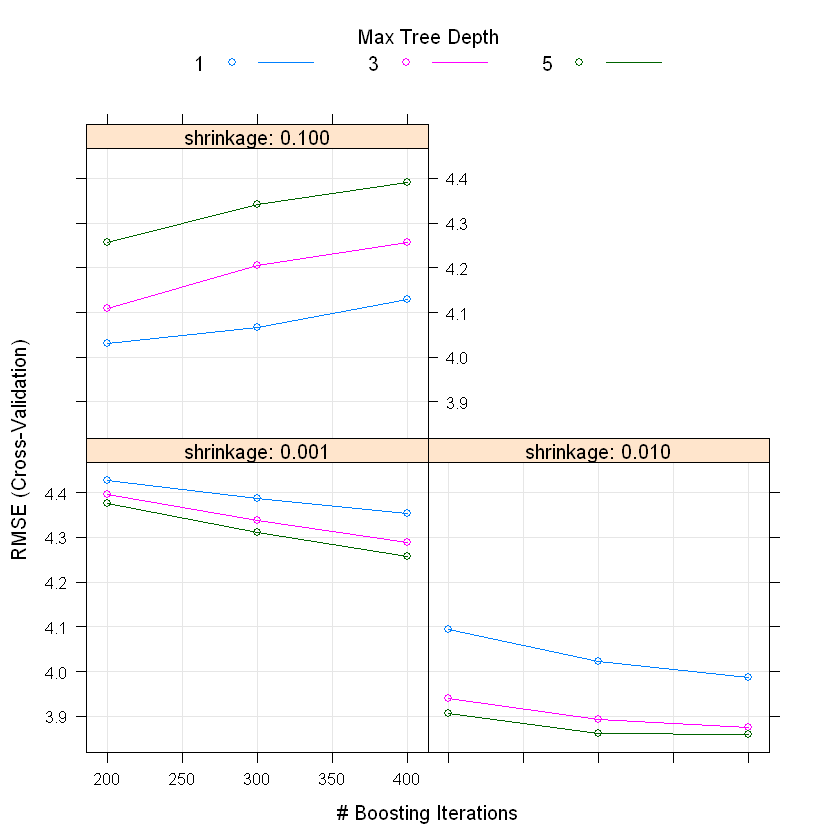

In [57]:
plot(sgb_fit)

In [78]:
#Prediction by using Stochastic Gradient Boosting
predict_sgb = predict(sgb_fit, test_set1 )
#RMSE calculation between prediction and test data
model_predict_comp_sgb=sqrt(mean((test_set1$Final_note - predict_sgb)^2))

In [79]:
comp_sgb = c()
comp_sgb[1] = as.numeric(model_sgb_rmse)
comp_sgb[2]= as.numeric(model_predict_comp_sgb)

In [80]:
#Model Comparison
model = c()
model[1] = "Penalized Regression Approaches (PRA)"
model[2] = "Decision Trees (DT)"
model[3] = "Random Forests (RF)"
model[4] = "Stochastic Gradient Boosting (SGB)"
data=matrix(0,4,3)
data[,1] = t(model)
data[1,2:3] = signif(comp_lasso,digits = 4)
data[2,2:3] = signif(comp_tree, digits =4)
data[3,2:3] = signif(comp_forest, digits =4)
data[4,2:3] = signif(comp_sgb, digits=4)
colnames(data) = c('Model','RMSE of Model', 'RMSE of Prediction')

In [81]:
data

Model,RMSE of Model,RMSE of Prediction
Penalized Regression Approaches (PRA),4.322,4.939
Decision Trees (DT),4.234,4.554
Random Forests (RF),3.844,4.288
Stochastic Gradient Boosting (SGB),3.858,4.286


### According to RMSE values random forest approach is the best approach to model the training data of student performance dataset. In the random forest approach the model minimum number of observations per tree leaf has lowest RMSE value. When we investigate the RMSE values calculated between test data and predicted data, the best model is Stochastic Gradient Boosting (SGB). However, the RMSE value of random forest also very similar to this model. SGB method is better than other methods in training weak models, since boosted trees are grown sequentially. In the model generation, learning rate with 0.01 value has the smallest RMSE value. Normally, learning rate is in between 0.001 and 0.3. Small values of of learning rate make model rebust, however in this model learnin rate is avarage. 